# **Segmenting Nuclei using StarDist in python**

In [ ]:
#Path and version numbers for python
!which python
!python --version

/usr/local/bin/python
Python 3.10.13


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [ ]:
!conda --version

conda 23.11.0


In [ ]:
!conda install -c conda-forge trackpy
!conda install -c conda-forge pims

In [ ]:
# for interactive plotting
%matplotlib inline

import numpy as np
import pandas as pd

import pims
import imageio
import trackpy as tp
import os

import matplotlib  as mpl
import matplotlib.pyplot as plt

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the directory containing your TIFF files (replace with your actual path)
tiff_dir = '/content/drive/MyDrive/mono'

# Create an empty list to store the frames
frames = []

# Loop through all TIFF files in the directory
for filename in sorted(os.listdir(tiff_dir)):
  if filename.endswith('.tif'):
    # Read each TIFF file using Pims
    frame = pims.open(os.path.join(tiff_dir, filename))
    frames.append(frame[0])

In [ ]:
print(frames)

[Frame([[1, 1, 1, ..., 3, 3, 3],
       [2, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [2, 1, 1, ..., 5, 5, 5],
       [2, 1, 2, ..., 5, 5, 5],
       [1, 1, 2, ..., 5, 5, 5]], dtype=uint8), Frame([[ 2,  2,  2, ...,  3,  3,  3],
       [ 2,  2,  2, ...,  3,  3,  3],
       [ 2,  2,  2, ...,  3,  3,  3],
       ...,
       [74, 68, 50, ..., 30, 32, 35],
       [72, 55, 44, ..., 24, 27, 29],
       [59, 46, 36, ..., 21, 22, 23]], dtype=uint8), Frame([[ 3,  3,  3, ...,  3,  2,  3],
       [ 3,  3,  3, ...,  3,  2,  3],
       [ 3,  3,  3, ...,  3,  2,  3],
       ...,
       [ 6,  6,  5, ...,  2,  2,  2],
       [ 6,  6,  5, ...,  2,  2,  2],
       [10,  7,  6, ...,  2,  2,  2]], dtype=uint8), Frame([[ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       ...,
       [64, 61, 57, ...,  4,  4,  4],
       [53, 53, 54, ...,  4,  3,  4],
       [47, 49, 50, ...,  4,  4,  3]], dtype=uint8), Frame([[ 4,  3,

In [ ]:
!pip install stardist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.1 MB/s eta 0:00:00


In [ ]:
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

In [ ]:
# prints a list of available models
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [ ]:
# Define a pretrained model to segment nuclei in fluorescence images (download from pretrained)
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 [==============================] - 2s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


(-0.5, 959.5, 719.5, -0.5)

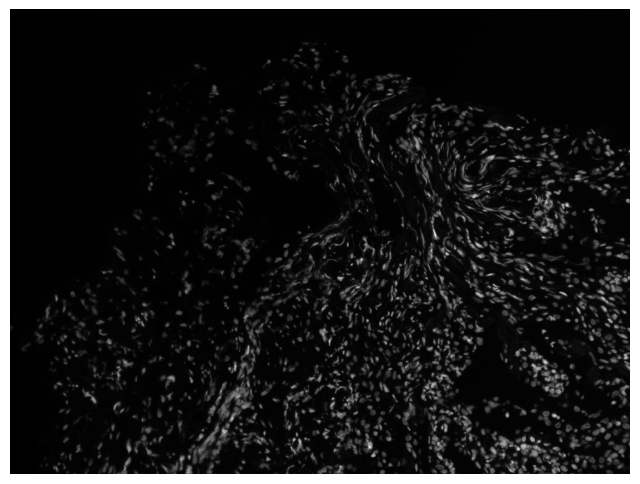

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(frames[0], cmap='gray')
plt.axis("off")

In [ ]:
@pims.pipeline
def stardist_segm(img):
  img_labels, img_details = model.predict_instances(normalize(img))
  return img_labels

### Apply the segmentation function to out time series data set.

In [ ]:
label_image = []
for frame in frames:
  label_image.append(stardist_segm(frame))

Plot a few images from our time series along with corresponding segmentation result.

Text(0.5, 1.0, 'prediction + input overlay')

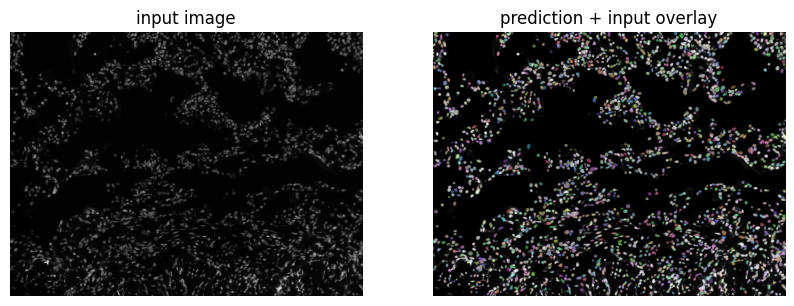

In [ ]:
img_num = 16
plt.subplot(1,2,1)
plt.imshow(frames[img_num], cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(label_image[img_num], img=frames[img_num]))
plt.axis("off")
plt.title("prediction + input overlay")

The segmentation result from Stardist already provides a labeled image.

### Let us use skimage.measure.regionprops to extract the centroid coordinates for all our objects

In [ ]:
import skimage

In [ ]:
import pandas as pd
from skimage import measure

# Create an empty DataFrame to store region properties
features = pd.DataFrame(columns=['y', 'x', 'frame', 'area'])

for num, img in enumerate(frames):
    # Extract region properties using skimage.measure.regionprops
    regions = measure.regionprops(label_image[num], intensity_image=img)

    # Check if any regions were found
    if regions:
        # Create a DataFrame from region properties for the current frame
        frame_features = pd.DataFrame.from_records(
            [{'y': r.centroid[0], 'x': r.centroid[1], 'frame': num, 'area': r.area} for r in regions]
        )

        # Append the frame-specific DataFrame to the main features DataFrame
        features = pd.concat([features, frame_features], ignore_index=True)

# Print or use the features DataFrame for further analysis
# print(features)


<ipython-input-80-083ccab6e920> (19): The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [ ]:
features.head(5)

y           x frame area
0  676.619048  795.202381     0   84
1  695.750000  265.861111     0   72
2  664.341463  311.910569     0  123
3  651.727273  213.920455     0   88
4  626.472527  829.857143     0   91

In [ ]:
features.shape

(41667, 4)

### We can use tp.annotate to display the objects that we will be tracking.

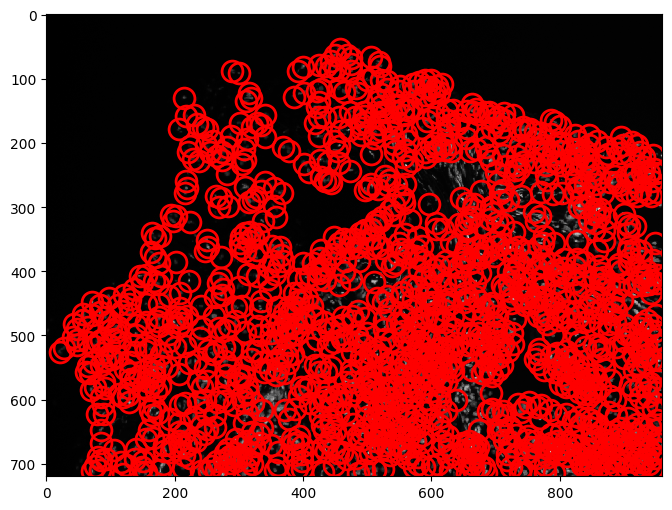

<Axes: >

In [ ]:
tp.annotate(features[features.frame==(0)], frames[0])

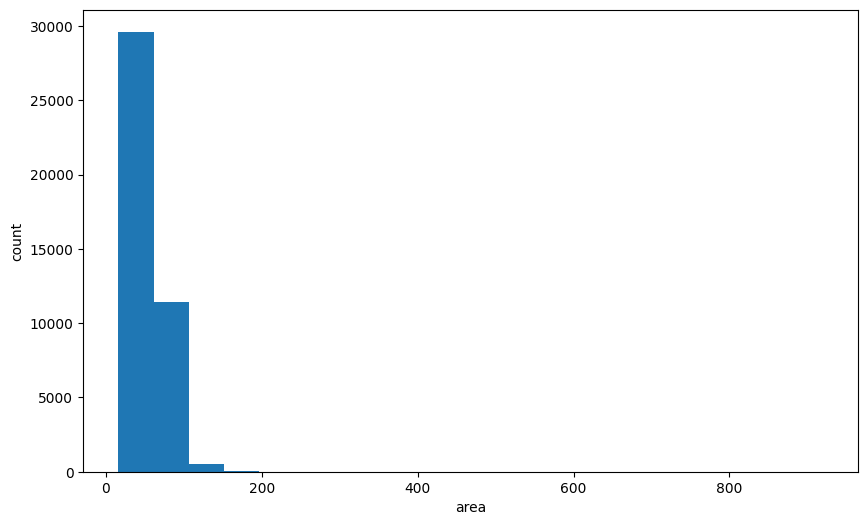

In [ ]:
#Plot object areas to investigate the distribution. You can further filter out objects based on size or intensity. Not required in our case.
fig, ax = plt.subplots()
ax.hist(features['area'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='area', ylabel='count');

### Bubble Tracking

In [ ]:
#Bubble tracking
# we must must specify a maximum displacement, the farthest a object can travel between frames (search_range)
# We allow for the possibility that an object might be missed for a few frames and then seen again.
# Memory keeps track of disappeared objects and maintains their ID for up to some number of frames after their last appearance.
# Here we use 5 frames.
#Note that the term particle refers to an object of interest.
search_range = 5
t = tp.link_df(features, search_range, memory=5)
t.head()

Frame 27: 289 trajectories present.


y           x  frame area  particle
0     676.619048  795.202381      0   84         0
1001  591.346939  459.244898      0   49         1
1000  442.580645  626.161290      0   31         2
999   423.758621  738.448276      0   29         3
998   391.861111  611.555556      0   36         4

### Plotting trajectories

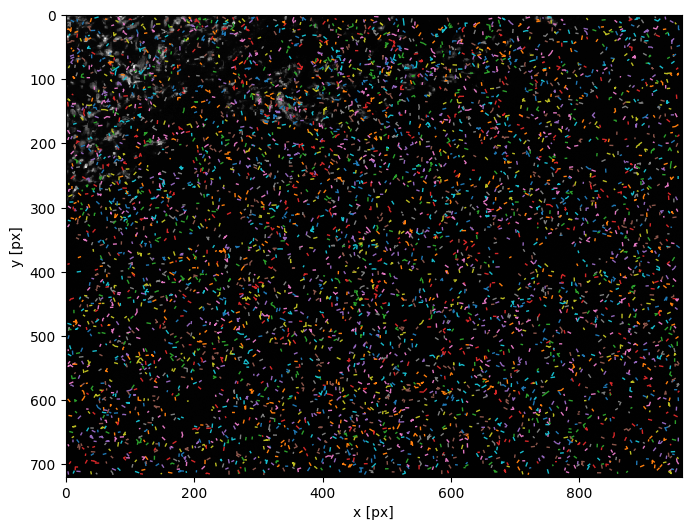

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [ ]:
tp.plot_traj(t, superimpose=img) #Remove the superimpose part to just plot the trajectories.

### Is there an overall drift? If so, we need to correct for it.

In [ ]:
drift = tp.compute_drift(t)

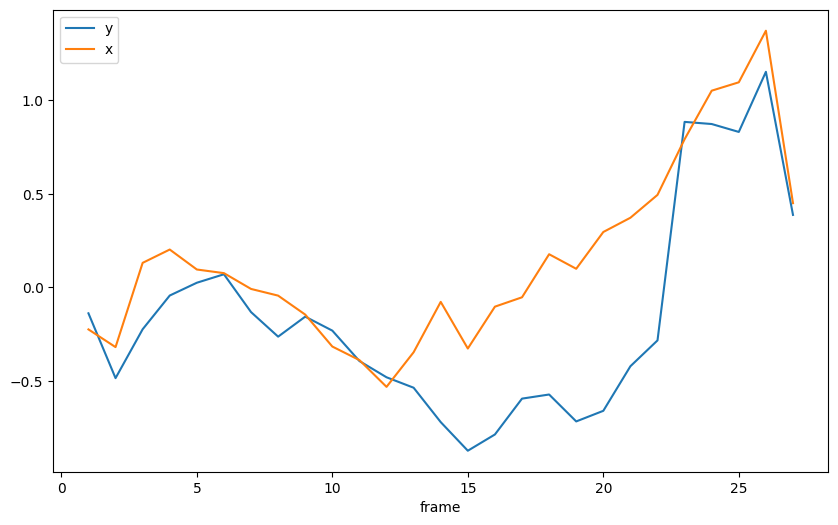

In [ ]:
drift.plot()
plt.show()

In [ ]:
t_corrected = tp.subtract_drift(t.copy(), drift)

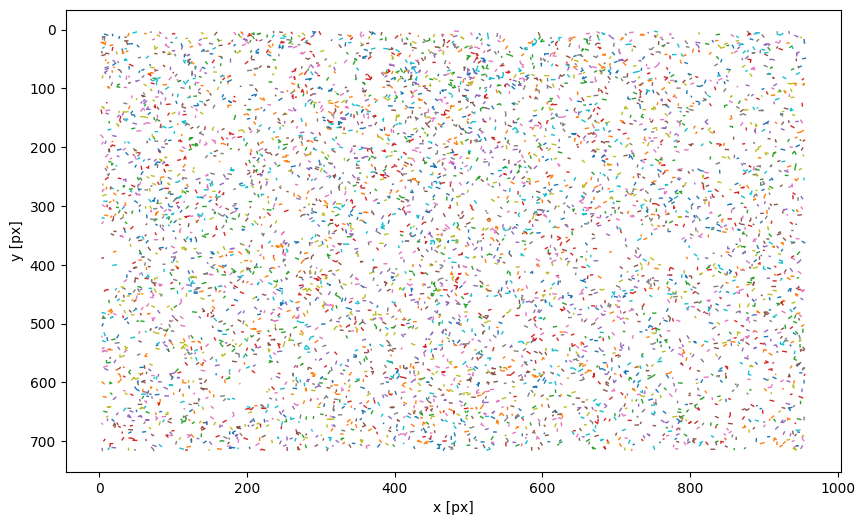

In [ ]:
ax = tp.plot_traj(t_corrected)
plt.show()

### Final Result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

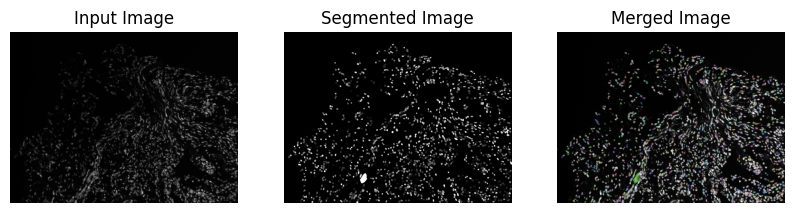

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

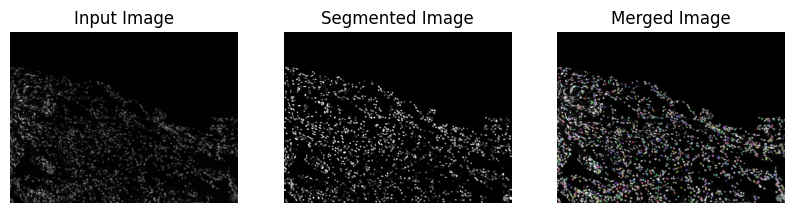

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

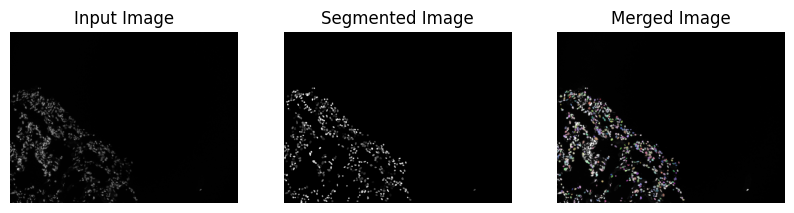

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

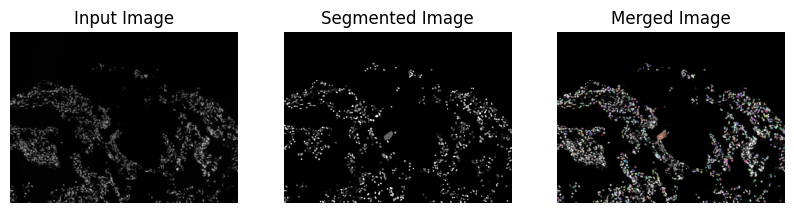

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

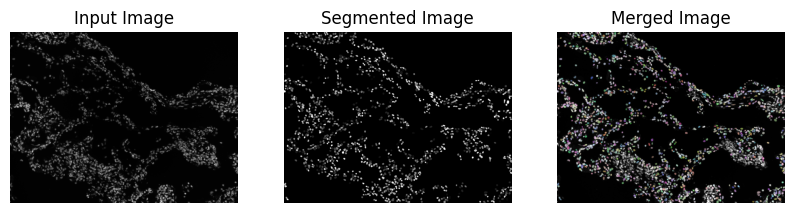

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

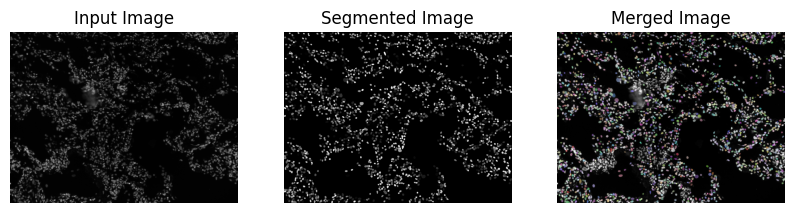

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

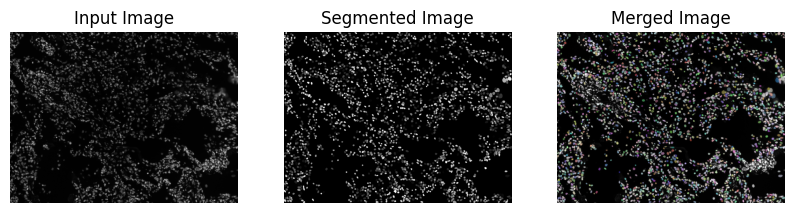

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

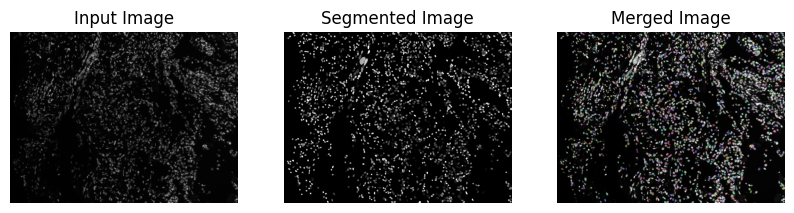

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

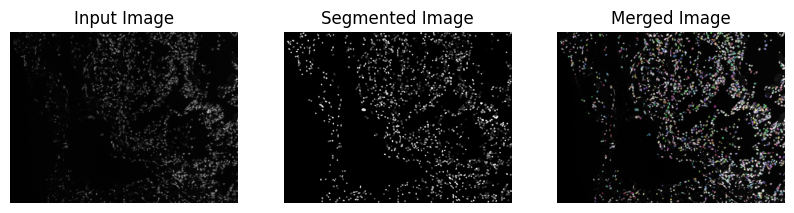

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

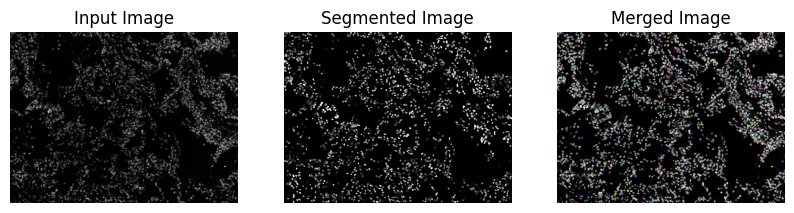

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

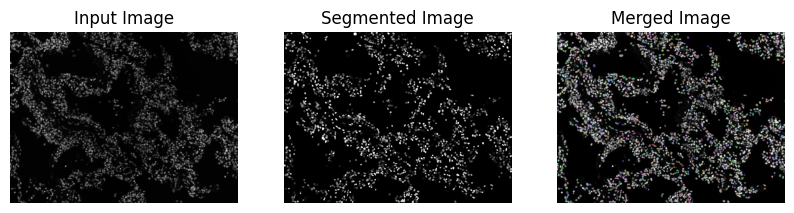

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

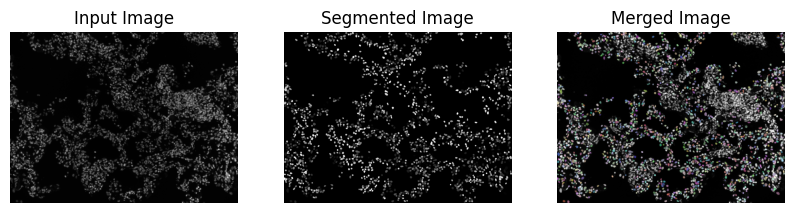

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

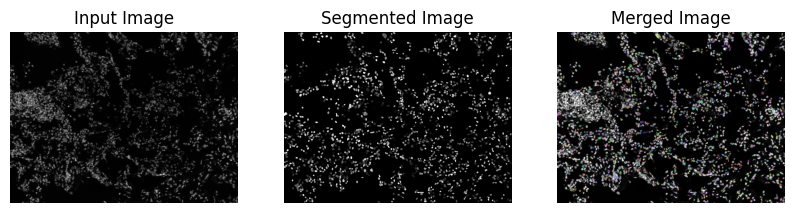

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

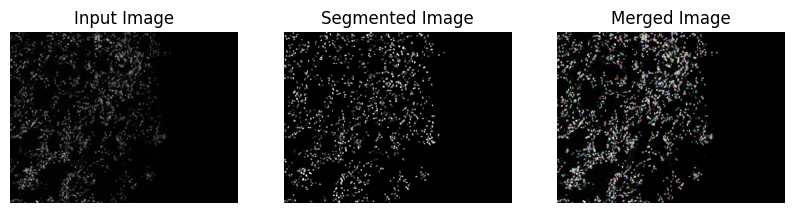

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

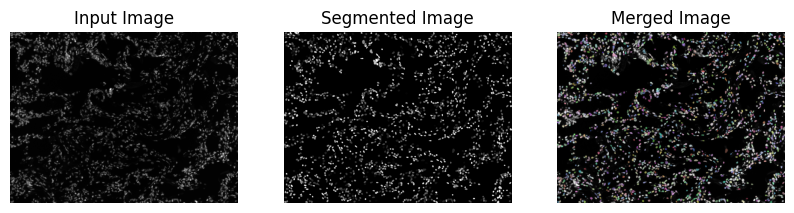

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

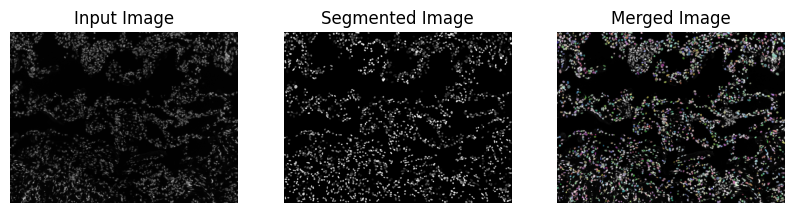

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

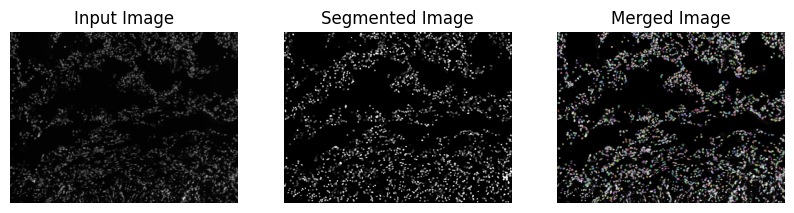

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

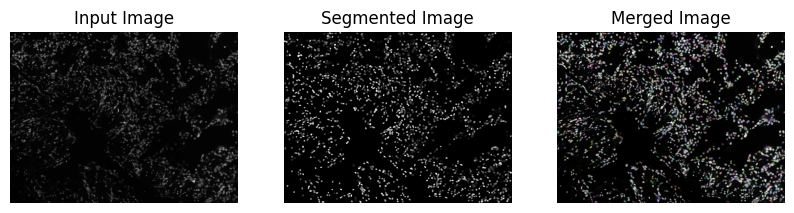

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

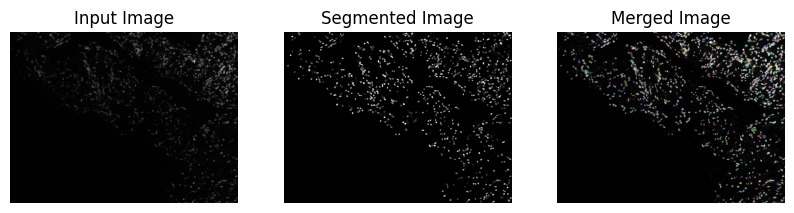

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

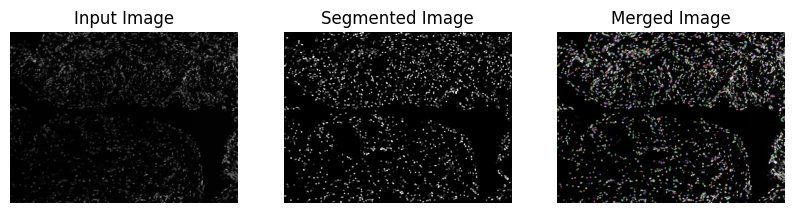

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

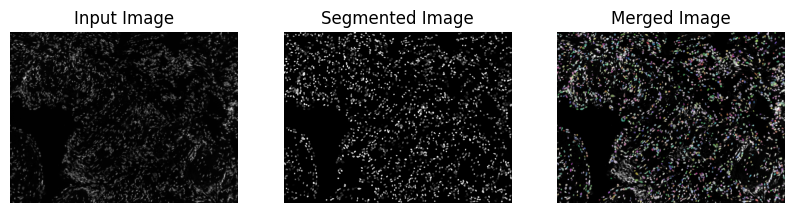

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

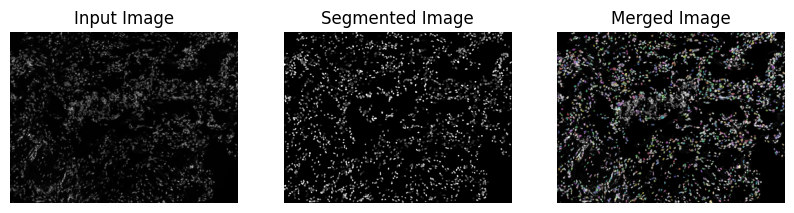

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

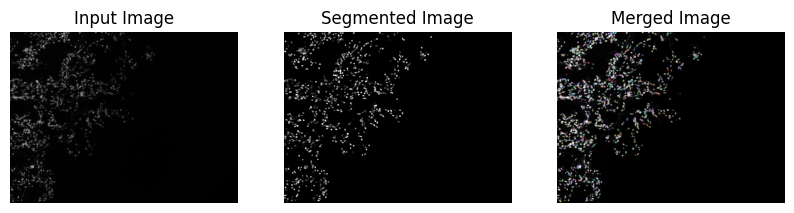

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

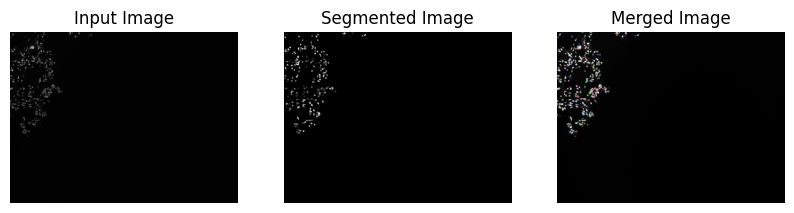

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

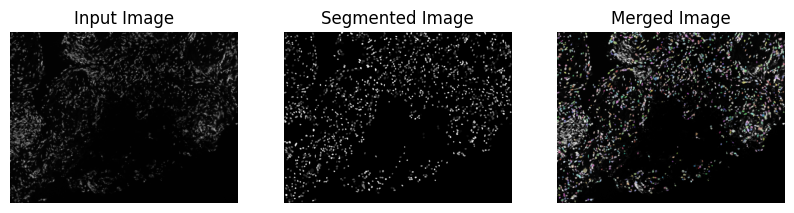

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

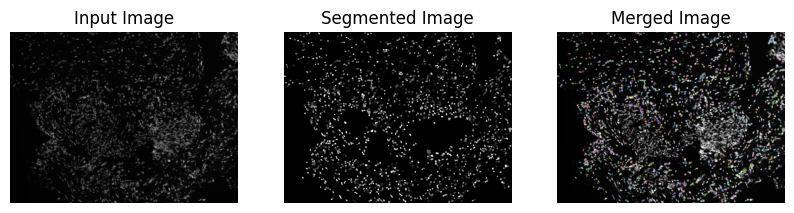

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

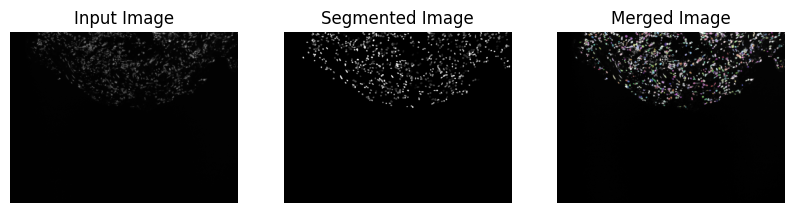

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

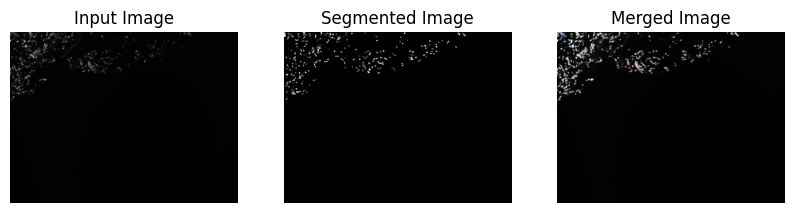

In [105]:
from google.colab import files
for img_num in range(len(frames)):

  # Create subplots
  plt.subplot(1, 3, 1)
  plt.imshow(frames[img_num], cmap="gray")
  plt.axis("off")
  plt.title("Input Image")

  plt.subplot(1, 3, 2)
  plt.imshow(label_image[img_num], cmap="gray")
  plt.axis("off")
  plt.title("Segmented Image")

  plt.subplot(1, 3, 3)
  plt.imshow(render_label(label_image[img_num], img=frames[img_num]))
  plt.axis("off")
  plt.title("Merged Image")

  plt.savefig("plot-{name}.png".format(name=img_num))
  files.download("plot-{name}.png".format(name=img_num))
  plt.show()